Name: Han Chen, Daniel Fernandez Davila

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Data Preprocessing (Bitcoin Price Data)
1. Downloaded from Kaggle https://www.kaggle.com/preslavrachev/bitcoin-historical-prices-from-cryptocompare-/data
2. Covers the price information from 4/23/2017 - 4/5/2018
3. Features: timestamp, date, open, close, low, high, weightedAverage, volume, quoteVolume
4. Market movement is labeled as 1 if moves up, -1 if goes down

#### Load data

In [2]:
price = pd.read_csv('Datasets/Bitcoin Prices/btc-prices-poloniex-23apr2017-05apr2018.csv')

In [3]:
price.head()

,timestamp,date,open,close,low,high,weightedAverage,volume,quoteVolume
0,1492905600,2017-04-23 00:00:00,1345.366757,1342.910929,1342.910929,1346.000000,1343.963411,7850.951428,5.841641
1,1492905900,2017-04-23 00:05:00,1342.910927,1342.075283,1341.604556,1344.981539,1342.890452,17088.046219,12.724825
2,1492906200,2017-04-23 00:10:00,1343.075283,1346.413255,1340.670731,1347.240054,1345.092995,39672.868368,29.494517
3,1492906500,2017-04-23 00:15:00,1346.413255,1343.032914,1340.566514,1346.854673,1342.783978,28832.240728,21.471987
4,1492906800,2017-04-23 00:20:00,1343.033059,1343.028538,1340.195931,1343.490234,1342.088574,16475.304939,12.275870


In [4]:
# calculate change in percentage for each 5 minutes
price['change in percentage (%)'] = (price['close'] - price['open']) * 100 /price['open']
price.head()

,timestamp,date,open,close,low,high,weightedAverage,volume,quoteVolume,change in percentage (%)
0,1492905600,2017-04-23 00:00:00,1345.366757,1342.910929,1342.910929,1346.000000,1343.963411,7850.951428,5.841641,-0.182540
1,1492905900,2017-04-23 00:05:00,1342.910927,1342.075283,1341.604556,1344.981539,1342.890452,17088.046219,12.724825,-0.062226
2,1492906200,2017-04-23 00:10:00,1343.075283,1346.413255,1340.670731,1347.240054,1345.092995,39672.868368,29.494517,0.248532
3,1492906500,2017-04-23 00:15:00,1346.413255,1343.032914,1340.566514,1346.854673,1342.783978,28832.240728,21.471987,-0.251063
4,1492906800,2017-04-23 00:20:00,1343.033059,1343.028538,1340.195931,1343.490234,1342.088574,16475.304939,12.275870,-0.000337


#### Group by 6 hours

In [5]:
times = [x for x in price['date'] if "00:00:00" in x or "06:00:00" in x or "12:00:00" in x or "18:00:00" in x]
times.sort()
daily_price = pd.DataFrame({"time":times})
# remove the last day because the day was not recordly completely
daily_price = daily_price[:-1]

In [6]:
# get the market movement every 6h
# take the open price of the first 5 minute interval, and the close price of the last 5 minute interval
# to calculate the percentage in change for one 6-hour time invertal
opens = []
closes = []
for i in range(len(daily_price['time'])):
    date = daily_price['time'][i].split()[0]
    if "00:00:00" in daily_price['time'][i]:
        open_in_price = daily_price['time'][i]
        close_in_price = date + ' ' + '05:55:00'
        opens.append(price.loc[price['date'] == open_in_price]['open'].item())
        closes.append(price.loc[price['date'] == close_in_price]['close'].item())
    elif "06:00:00" in daily_price['time'][i]:
        open_in_price = daily_price['time'][i]
        close_in_price = date + ' ' + '11:55:00'
        opens.append(price.loc[price['date'] == open_in_price]['open'].item())
        closes.append(price.loc[price['date'] == close_in_price]['close'].item())
    elif "12:00:00" in daily_price['time'][i]:
        open_in_price = daily_price['time'][i]
        close_in_price = date + ' ' + '17:55:00'
        opens.append(price.loc[price['date'] == open_in_price]['open'].item())
        closes.append(price.loc[price['date'] == close_in_price]['close'].item())
    else: 
        open_in_price = daily_price['time'][i]
        close_in_price = date + ' ' + '23:55:00'
        opens.append(price.loc[price['date'] == open_in_price]['open'].item())
        closes.append(price.loc[price['date'] == close_in_price]['close'].item())

daily_price['open'] = opens
daily_price['close'] = closes
daily_price.head(20)

,time,open,close
0,2017-04-23 00:00:00,1345.366757,1342.072943
1,2017-04-23 06:00:00,1342.072943,1342.639048
2,2017-04-23 12:00:00,1341.000005,1349.856978
3,2017-04-23 18:00:00,1348.405313,1352.193569
4,2017-04-24 00:00:00,1352.193569,1351.000000
5,2017-04-24 06:00:00,1351.000000,1336.419090
6,2017-04-24 12:00:00,1336.020000,1340.300000
7,2017-04-24 18:00:00,1340.300000,1347.399011
8,2017-04-25 00:00:00,1346.862890,1347.223600
9,2017-04-25 06:00:00,1347.223600,1364.896000


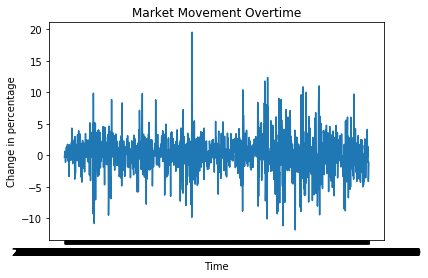

In [7]:
# Visualzation of the market movements
daily_price['change (%)'] = (daily_price['close'] - daily_price['open']) * 100 / daily_price['open']
plt.plot(daily_price['time'], daily_price['change (%)'])
plt.xlabel('Time')
plt.ylabel('Change in percentage')
plt.title("Market Movement Overtime")
plt.show()

In [8]:
daily_price['change (%)'].describe()

count    1388.000000
mean        0.156095
std         2.977785
min       -11.819329
25%        -1.272040
50%         0.273177
75%         1.703637
max        19.534884
Name: change (%), dtype: float64

In [9]:
daily_price.head(20)

,time,open,close,change (%)
0,2017-04-23 00:00:00,1345.366757,1342.072943,-0.244827
1,2017-04-23 06:00:00,1342.072943,1342.639048,0.042181
2,2017-04-23 12:00:00,1341.000005,1349.856978,0.660475
3,2017-04-23 18:00:00,1348.405313,1352.193569,0.280943
4,2017-04-24 00:00:00,1352.193569,1351.000000,-0.088269
5,2017-04-24 06:00:00,1351.000000,1336.419090,-1.079268
6,2017-04-24 12:00:00,1336.020000,1340.300000,0.320354
7,2017-04-24 18:00:00,1340.300000,1347.399011,0.529658
8,2017-04-25 00:00:00,1346.862890,1347.223600,0.026781
9,2017-04-25 06:00:00,1347.223600,1364.896000,1.311764


In [10]:
movement = []
for c in daily_price['change (%)']:
    if c > 0:
        movement.append(1)
    elif c < 0:
        movement.append(-1)
    else: movement.append(0)
daily_price['movement'] = movement

In [11]:
daily_price.head(20)

,time,open,close,change (%),movement
0,2017-04-23 00:00:00,1345.366757,1342.072943,-0.244827,-1
1,2017-04-23 06:00:00,1342.072943,1342.639048,0.042181,1
2,2017-04-23 12:00:00,1341.000005,1349.856978,0.660475,1
3,2017-04-23 18:00:00,1348.405313,1352.193569,0.280943,1
4,2017-04-24 00:00:00,1352.193569,1351.000000,-0.088269,-1
5,2017-04-24 06:00:00,1351.000000,1336.419090,-1.079268,-1
6,2017-04-24 12:00:00,1336.020000,1340.300000,0.320354,1
7,2017-04-24 18:00:00,1340.300000,1347.399011,0.529658,1
8,2017-04-25 00:00:00,1346.862890,1347.223600,0.026781,1
9,2017-04-25 06:00:00,1347.223600,1364.896000,1.311764,1


#### Tweets 

In [12]:
tweets = pd.read_csv('tweets_clean.csv')

In [13]:
len(tweets)

67943

In [14]:
tweets = tweets.filter(items=['created_at','text','rt'])

In [15]:
tweets.head()

,created_at,text,rt
0,2018-03-26 17:09:23,RT @coindesk: Cboe Prods SEC on Bitcoin ETF Ap...,1
1,2018-03-22 17:28:31,RT @GeminiDotCom: U.K. fintech firm @BeeksFinC...,1
2,2018-03-22 17:26:58,RT @BeeksFinCloud: Write up in @financemagnate...,1
3,2018-03-17 23:24:44,RT @coindesk: Peter Thiel: Bitcoin Will Be the...,1
4,2018-03-16 22:59:20,"RT @HumanoidHistory: March 16, 1966: Astronaut...",1


In [16]:
import datetime
# convert string to datetime format
tweet_date = [datetime.datetime(int(tweets.iloc[i,0][0:4]),int(tweets.iloc[i,0][5:7]),int(tweets.iloc[i,0][8:10]),
                                int(tweets.iloc[i,0][11:13]), int(tweets.iloc[i,0][14:16])) for i in range(len(tweets))]
tweets['tweet_date'] = tweet_date

In [17]:
tweets.head()

,created_at,text,rt,tweet_date
0,2018-03-26 17:09:23,RT @coindesk: Cboe Prods SEC on Bitcoin ETF Ap...,1,2018-03-26 17:09:00
1,2018-03-22 17:28:31,RT @GeminiDotCom: U.K. fintech firm @BeeksFinC...,1,2018-03-22 17:28:00
2,2018-03-22 17:26:58,RT @BeeksFinCloud: Write up in @financemagnate...,1,2018-03-22 17:26:00
3,2018-03-17 23:24:44,RT @coindesk: Peter Thiel: Bitcoin Will Be the...,1,2018-03-17 23:24:00
4,2018-03-16 22:59:20,"RT @HumanoidHistory: March 16, 1966: Astronaut...",1,2018-03-16 22:59:00


In [18]:
grouped_tweets = tweets.groupby(pd.Grouper(key='tweet_date', freq='6h'))

In [19]:
# group by days and concatenate all texts
daily_tweet = pd.DataFrame(grouped_tweets['text'].apply(lambda x: "%s" % ' '.join(x)))

In [20]:
# count number of tweets posted each day
daily_count = pd.DataFrame(grouped_tweets['text'].apply(lambda x: len(x)))
daily_count.columns = ["count"]
daily_count.head()

,count
tweet_date,
2010-12-07 00:00:00,1
2010-12-07 06:00:00,0
2010-12-07 12:00:00,0
2010-12-07 18:00:00,1
2010-12-08 00:00:00,0


In [21]:
daily_tweet.head()

,text
tweet_date,
2010-12-07 00:00:00,RT @EFF: Thank you to our #bitcoin P2P cryptoc...
2010-12-07 06:00:00,
2010-12-07 12:00:00,
2010-12-07 18:00:00,Launched my second #bitcoin project today:
2010-12-08 00:00:00,


### Merge
Merge two datasets by the key time. The resulting data set has time, open, close, change (%), movement (label), and all the tweets posted during 6 hours in the text box.  
After merging, we have an imbalanced data, more positvive movements than negative movements. To balance the dataset out, we undersampled the +1 data in the next notebook file.

In [22]:
daily_price.index = daily_price['time']
daily_price.head()

,time,open,close,change (%),movement
time,,,,,
2017-04-23 00:00:00,2017-04-23 00:00:00,1345.366757,1342.072943,-0.244827,-1
2017-04-23 06:00:00,2017-04-23 06:00:00,1342.072943,1342.639048,0.042181,1
2017-04-23 12:00:00,2017-04-23 12:00:00,1341.000005,1349.856978,0.660475,1
2017-04-23 18:00:00,2017-04-23 18:00:00,1348.405313,1352.193569,0.280943,1
2017-04-24 00:00:00,2017-04-24 00:00:00,1352.193569,1351.000000,-0.088269,-1


In [24]:
# merge by common key time
data = daily_price.merge(daily_tweet,right_index=True,left_index=True)
data = data.drop(['time'],axis=1)
data.head()

,open,close,change (%),movement,text
2017-04-23 00:00:00,1345.366757,1342.072943,-0.244827,-1,"#Banks vs #cryptocurrency war: Bitfinex, OKcoi..."
2017-04-23 06:00:00,1342.072943,1342.639048,0.042181,1,The Bitcoin scaling debate reminds me of feedi...
2017-04-23 12:00:00,1341.000005,1349.856978,0.660475,1,Bitcoin Origins RT @CHalexov2016: Time to buy ...
2017-04-23 18:00:00,1348.405313,1352.193569,0.280943,1,@FredericJacobs @fchollet @EmmanuelMacron Le c...
2017-04-24 00:00:00,1352.193569,1351.000000,-0.088269,-1,The end of cash: It a Bit harder to trace onli...


In [25]:
final_data = data.merge(daily_count,right_index=True,left_index=True)

In [28]:
final_data = final_data[final_data['movement'] != 0]

In [31]:
# Write out to csv files
final_data.to_csv('data_to_ml_models.csv')

In [29]:
len(final_data)

1387

In [30]:
from collections import Counter
Counter(final_data['movement'])

Counter({-1: 627, 1: 760})